In [1]:
import importlib
import PS_class as PS
importlib.reload(PS)

GrowthFunction = PS.GrowthFunction
Overdensities = PS.Overdensities 
HaloMassFunction = PS.HaloMassFunction 
MergerRate = PS.MergerRate 

o = Overdensities(0)




import numpy as np
import scipy.integrate as integrate
import matplotlib as mpl
mpl.use('pgf')
import matplotlib.pyplot as plt
from astropy.cosmology import WMAP9 as cosmo
from astropy import constants
from astropy import units as u
from cycler import cycler
import scipy.interpolate
import matplotlib.ticker as mticker
import math
%matplotlib inline
from IPython.display import set_matplotlib_formats


set_matplotlib_formats('png')
%matplotlib inline
mpl.style.use('default')

myColors = ["#009E73", "#0072B2", "#CC79A7", "#D55E00", "#56B4E9", "#F0E442", "#E69F00", "#000000"]
colors= ["white", myColors[4], myColors[1], myColors[0], myColors[5], myColors[6], myColors[3]]
myNodes = [0.0, 0.1, 0.2, 0.35, 0.5, 0.85, 1.0]
myCmap = mpl.colors.LinearSegmentedColormap.from_list("mycmap", list(zip(myNodes, colors)))

colorsLog= ["white",  myColors[4], myColors[1], myColors[6], myColors[3], myColors[3]]
myNodesLog = [0.0, 0.1 , 0.2, 0.36, 0.6, 1]
myCmapLog = mpl.colors.LinearSegmentedColormap.from_list("mycmapLog", list(zip(myNodesLog, colorsLog)))

SMALL_SIZE = 10
MEDIUM_SIZE = 12
BIGGER_SIZE = 15

mpl.rcParams['agg.path.chunksize'] = 10000
plt.rcParams.update({
	'font.family':'serif',
	'mathtext.fontset' : 'cm',
	'mathtext.rm': 'serif',
	'font.weight': 'normal',
	})
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE) 
plt.rcParams.update({'font.size': 15})

mpl.rcParams['axes.prop_cycle'] = cycler(color=myColors)

path_image = '/Users/antoninpantalacci/Desktop/Master Project/Papernotes and Books/Graph/P-S/P-S/Outputs/'

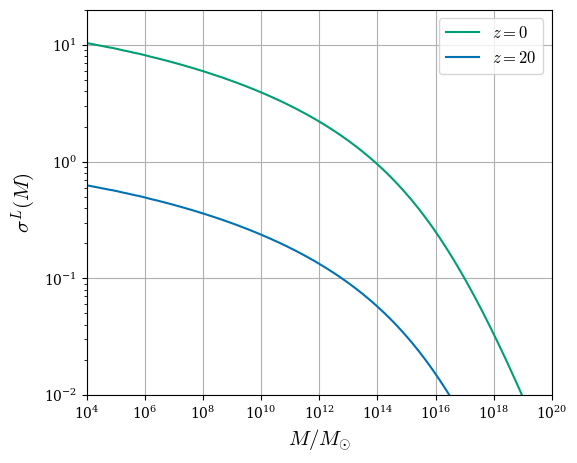

In [2]:
Fig, ax = plt.subplots(figsize=(6,5))

m = np.logspace(4, 20, 200)

for j in range(2):
    O=Overdensities(j*20)
    for i in range(1):
        name=['Top-Hat', 'Gaussian', 'K-Sharp']
        ax.plot(m, O.S_Z(m, j*20), label = f'$z={j*20}$')

        
ax.set_xscale('log')
ax.set_xlabel('$M/M_{\odot}$')
ax.set_ylabel('$\sigma^L(M)$')
ax.set_yscale('log')
ax.legend()
ax.grid()

ax.set_xlim(1e4, 1e20)
ax.set_ylim(1e-2, 2e1)
Fig.savefig(path_image+'sigma_z.png', dpi=500, bbox_inches="tight")

In [3]:
path = '/Users/antoninpantalacci/Desktop/Master Project/Papernotes and Books/Graph/P-S/P-S/'

data = np.genfromtxt(path + 'Binney,Tremaine.csv', delimiter=';')
springel = np.genfromtxt(path + 'Springel.csv', delimiter=';')


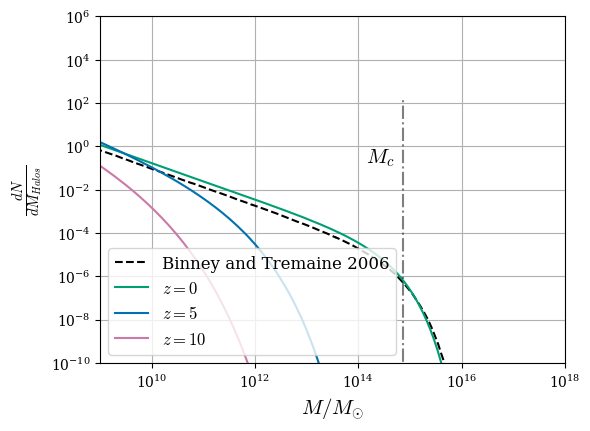

In [4]:
Fig, bx = plt.subplots(figsize=(6,4.5))

bx.plot(data[:,0], data[:,1], 'k--', label = 'Binney and Tremaine 2006')
HIMF=HaloMassFunction(0, logmass_lim=(4, 20), Nbins=100)

m = np.logspace(4, 18, 200)

for i in range(3):
    bx.plot(m, HIMF.IMF(m, i*5), label = f'$z={i*5}$')
bx.set_xscale('log')
bx.set_xlabel('$M/M_{\odot}$')
bx.set_ylabel(r'$\frac{dN}{dM_{Halos}}$')
bx.set_yscale('log')
bx.set_ylim(1e-10,1e6)
bx.set_xlim(1e9,1e18)
bx.grid()

bx.annotate('$M_c$', xy=(5e14, 1), horizontalalignment='right', verticalalignment='top' )
bx.plot((7.4e14,7.4e14), (1e-12, 200), 'k-.', alpha=0.5)
bx.legend(loc=3)

Fig.savefig(path_image+'halo_IMF.png', dpi=500, bbox_inches="tight")


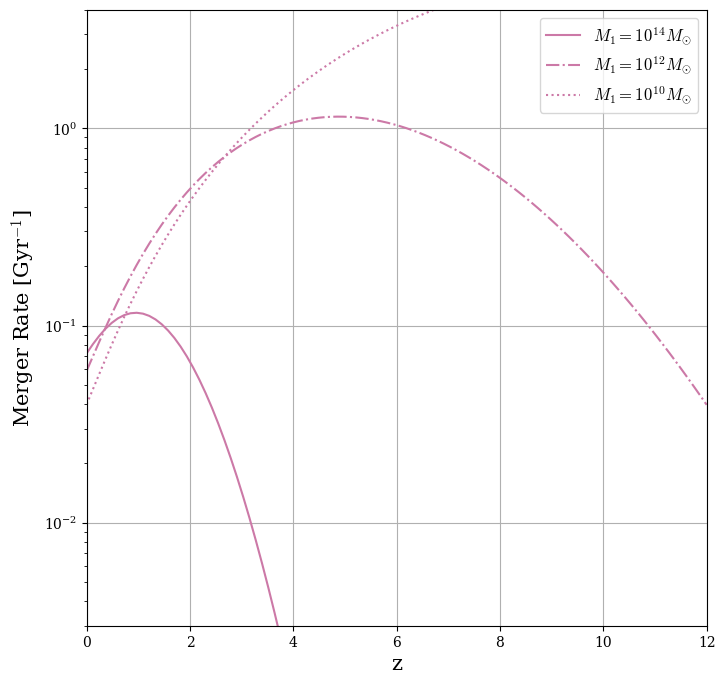

In [6]:
Merge = MergerRate(0)
Fig, dx = plt.subplots(figsize=(8,8))
M_1=[1e14, 1e12, 1e10]

custom_cycler = (cycler(linestyle=['-', '-.', ':']))
dx.set_prop_cycle(custom_cycler)

z = np.linspace(0, 12, 100)
for i in range(len(M_1)):
    logM1 = str(int(np.log10(M_1[i])))
    MR = Merge.MergerRate_M_Z(2*M_1[i], M_1[i], z)
    dx.plot(z, MR, c=myColors[2], label=r"$M_1=10^{"+logM1+"}M_{\odot}$")

dx.set_ylabel('Merger Rate [Gyr$^{-1}$]')
dx.set_xlabel('z')
dx.set_yscale('log')
dx.grid()
dx.set_ylim(0.003, 4)
dx.set_xlim(0, 12)
dx.legend()

Fig.savefig(path_image+'Merger_rate.png', dpi=500)

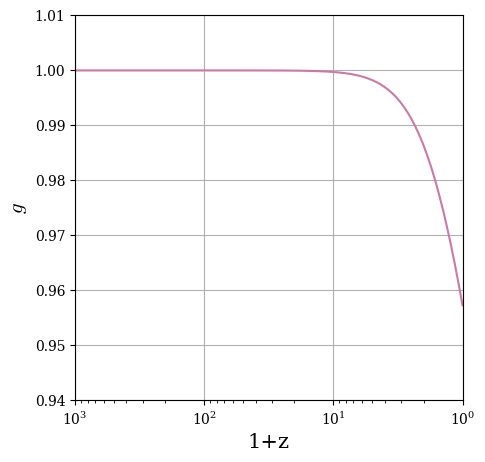

In [7]:
Fig, ex = plt.subplots(figsize=(5,5))

GF=GrowthFunction()
z=np.logspace(0, 3, 100)
g=GF.g_of_z(z)
ex.plot(z,g, c=myColors[2])
ex.set_xlim(1000, 1) 
ex.set_ylim(0.94, 1.01)
ex.set_xscale('log')
ex.set_xlabel('1+z')
ex.set_ylabel('$g$')
ex.grid()
Fig.savefig(path_image+'g_of_z.png', dpi=500, bbox_inches="tight")